<ipython-input-1-e70368e6ba25>:121: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  trueIntercept =np.asscalar(-tClf.intercept_*(1/tClf.coef_))
<ipython-input-1-e70368e6ba25>:122: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  true25 =np.asscalar(trueIntercept-(1/tClf.coef_)*math.log(0.75/0.25))
<ipython-input-1-e70368e6ba25>:123: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  true75 =np.asscalar(trueIntercept-(1/tClf.coef_)*math.log(0.25/0.75))
<ipython-input-1-e70368e6ba25>:121: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  trueIntercept =np.asscalar(-tClf.intercept_*(1/tClf.coef_))
<ipython-input-1-e70368e6ba25>:122: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  true25 =np.asscalar(trueIntercept-(1/tClf.coef_)*math.log(0.75/0.25))
<ipython-input-1-e70368e6ba25>:123:

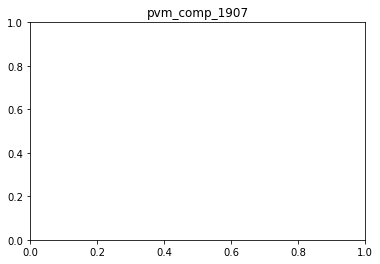

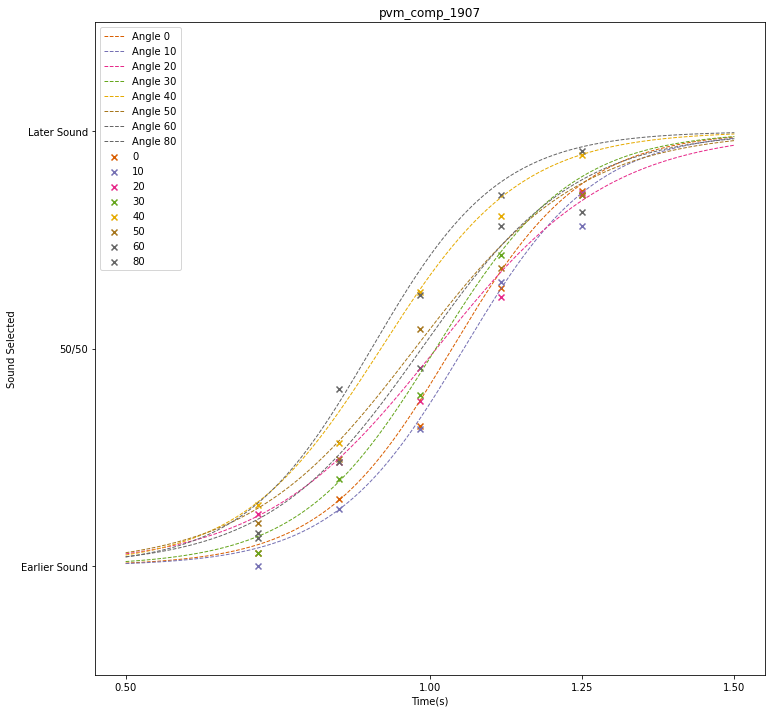

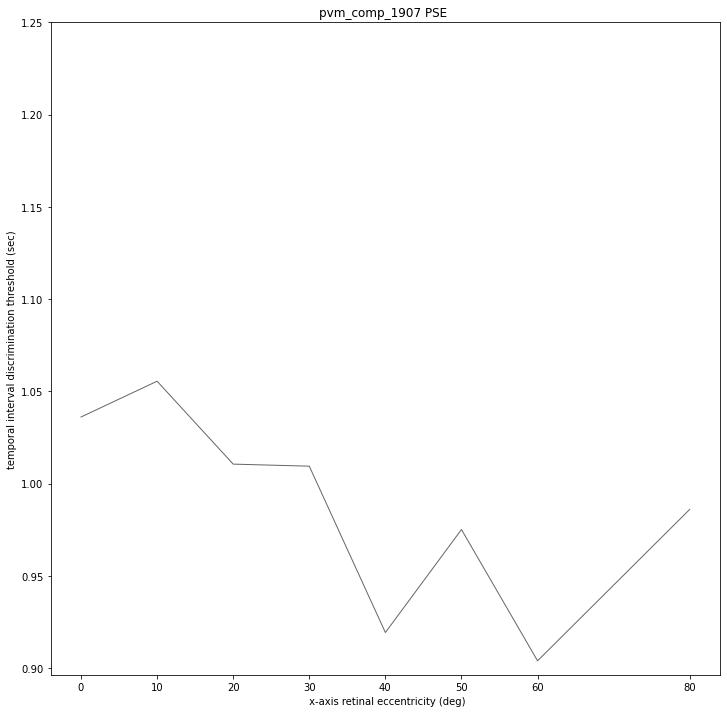

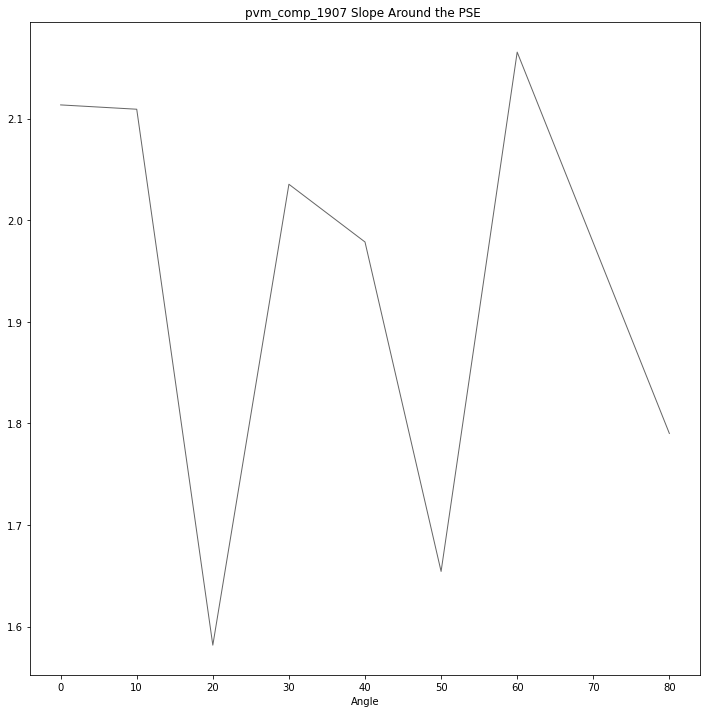

In [1]:

#legacy code removed, if needed check logendgame script in 1907 folder 


from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from scipy.special import expit


xFmin, xFmax = 0, 120*60





FrameStim=[43,51, 59,67,75]
stimLength =[2]
### left or right of the screen for the stimulus
mod = [1, -1]
angleSeq = [0,10,20,30,40,50,60,80]




##loads up the spreadsheet
baseName ='pvm_comp_1907'
b = baseName + '.xlsx'
dataEx = pd.read_excel(b)      




fI =1
for angleSeqN in angleSeq:
    justAng = dataEx.loc[dataEx['angleSeq'] == angleSeqN]
    
    
    for fstFrameN in FrameStim:
        sizeAng = justAng.loc[justAng['FrameStim'] == fstFrameN]
       
        
        totalC = sizeAng.loc[sizeAng['Resp_mean'] == 1]
        countCa = len(totalC)
        if countCa == 0:
            percentS = 0
        else:
            percentS = countCa/len(sizeAng)
        
        
        d = {'angleSeq': angleSeqN, 'fstFrameN': fstFrameN,'percentS': percentS, 'Observer': b} #"timebefore_mean": timebefore_mean, 'Resp_mean': Resp_mean, 'frameStim_mean':frameStim_mean
        
        if fI ==1:
            results = pd.DataFrame(d, index = [0])
            fI =2
        
        else:
            results = results.append(d, ignore_index = True)
        
    
    
c = baseName + '_results.csv' 
results.to_csv(c)

sampleRate=10000
X_test = np.linspace(0.5, 1.5, sampleRate*60)
plt.title(baseName)
plt.figure(figsize=(12,12))

cmap=plt.cm.Dark2
c2 = cmap(np.linspace(0,1,9)) 
newI=1

fI=1
for angleSeqN in angleSeq:
    
    colorZ = c2[newI]
    newI = newI+1
    
    sizePlot = results.loc[results['angleSeq'] == angleSeqN]
    
    justAng = dataEx.loc[dataEx['angleSeq'] == angleSeqN]
 
    plt.xticks([ 0.5, 1, 1.25,1.5 ])
    plt.yticks([0, 0.5, 1], ['Earlier Sound', '50/50', 'Later Sound'])
    plt.ylim(-.25, 1.25)
  
    
    

    y =  pd.DataFrame.to_numpy(justAng.Resp_mean)
    trueX = pd.DataFrame.to_numpy(justAng.timebefore_mean)


    trueX = trueX.reshape(-1,1)
    tClf =  linear_model.LogisticRegression(penalty='none')
    tClf.fit(trueX, y)
    lossT = expit(X_test * tClf.coef_ + tClf.intercept_).ravel()
    
    
    #Note the curves are fit to true time rather then the frames
    plt.scatter(sizePlot.fstFrameN/60, sizePlot.percentS, label=angleSeqN, marker='x', linewidths=200, color = colorZ)
    
    frameLabel = 'Angle ' + str(angleSeqN)
    
    trueLabel = 'Angle ' + str(angleSeqN)
    plt.plot(X_test, lossT,'--', linewidth=1, label=trueLabel, color = colorZ)
    plt.ylabel('Sound Selected')
    plt.xlabel('Time(s)')
    plt.legend()
    plt.title(baseName)
    

    
    plt.savefig(baseName+ 'angleSeq')

 
    
    trueIntercept =np.asscalar(-tClf.intercept_*(1/tClf.coef_))
    true25 =np.asscalar(trueIntercept-(1/tClf.coef_)*math.log(0.75/0.25))
    true75 =np.asscalar(trueIntercept-(1/tClf.coef_)*math.log(0.25/0.75))
    trueSlope = 0.5/(true75-true25)    
    
    e= { 'angle': angleSeqN, 'trueIntercept':trueIntercept, 'trueSlope':trueSlope} 
        
    if fI ==1:
        PSEResults = pd.DataFrame(e, index = [0])
        fI =2
        
    else:
        PSEResults = PSEResults.append(e, ignore_index = True)
        

f = baseName + '_PSEresults.csv'     
PSEResults.to_csv(f)        

psePlt = plt

psePlt.figure(figsize=(12,12))
psePlt.title(baseName + ' PSE ')
psePlt.plot(PSEResults.angle, PSEResults.trueIntercept, linewidth=1, label=frameLabel, color = colorZ)
psePlt.ylabel('temporal interval discrimination threshold (sec)')
psePlt.xlabel(' x-axis retinal eccentricity (deg)')
psePlt.savefig(baseName+ 'PSE')
psePlt.xticks(PSEResults.angle)
psePlt.xlim=(20,90)
psePlt.yticks(np.arange(0.9, 1.3, step=0.05))




plt.figure(figsize=(12,12))
plt.plot(PSEResults.angle, PSEResults.trueSlope, linewidth=1, label=frameLabel, color = colorZ)       
plt.title(baseName + ' Slope Around the PSE ')     
plt.ylabel('')
plt.xlabel('Angle')   

plt.savefig(baseName+ 'PSE Slope')   
    
 
    
        
    #plt.show()
    



        

